# Class Activity

Build a Regression Machine Learning Model using Mama Tee restaurant dataset.
The objective of the regression task is to predict the amount of tip (gratuity in Nigeria naira) given to a food server based on total_bill, gender, smoker (whether they smoke in the party or not), day (day of the week for the party), time (time of the day whether for lunch or dinner), and size (size of the party) in Mama Tee restaurant.

#### TODO
- Get the dataset from your AI Invasion Study Pack: "Tips.csv"

### Step #1 Importing the required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn
import sklearn

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### Step#2 Loading the dataset

In [2]:

df = pd.read_csv("tips.csv") #TODO: Add the path to your dataset 

df.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  744 non-null    float64
 1   tip         744 non-null    float64
 2   gender      744 non-null    object 
 3   smoker      744 non-null    object 
 4   day         744 non-null    object 
 5   time        744 non-null    object 
 6   size        744 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 40.8+ KB


In [4]:
df.describe()

,total_bill,tip,size
count,744.000000,744.000000,744.000000
mean,2165.006640,325.948091,3.180108
std,954.248806,148.778225,1.532890
min,44.690000,0.000000,1.000000
25%,1499.022500,218.000000,2.000000
50%,2102.610000,320.460000,3.000000
75%,2743.802500,415.562500,4.000000
max,5538.290000,1090.000000,6.000000


### Step#3 Clean the dataset

In [5]:
df.columns

Index(['total_bill', 'tip', 'gender', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
# Check for missing value
df.isnull().sum()

total_bill    0
tip           0
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
# Check and make sure all missing valuen have been filled
df.isnull().sum()

total_bill    0
tip           0
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
cat_features = {
    "gender",
    "smoker",
    "day",
    "time",
    
}

for cat_feature in cat_features:
    print(cat_feature,df[cat_feature].unique(), sep=":")
    print("#"*50)

gender:['Male' 'Female']
##################################################
time:['Lunch' 'Dinner']
##################################################
day:['Thur' 'Sun' 'Mon' 'Sat' 'Wed' 'Tues' 'Fri']
##################################################
smoker:['No' 'Yes']
##################################################


In [9]:
cat_features = ["gender","smoker","day","time"]

for cat_feature in cat_features:
    df[f"{cat_feature}_cat"] = df[cat_feature].astype('category')
    df[f"{cat_feature}_cat"] = df[f"{cat_feature}_cat"].cat.codes
    
    
#Read more on Pandas get_dummies

df.head()

,total_bill,tip,gender,smoker,day,time,size,gender_cat,smoker_cat,day_cat,time_cat
0,2125.50,360.79,Male,No,Thur,Lunch,1,1,0,4,1
1,2727.18,259.42,Female,No,Sun,Dinner,5,0,0,3,0
2,1066.02,274.68,Female,Yes,Thur,Dinner,4,0,1,4,0
3,3493.45,337.90,Female,No,Sun,Dinner,1,0,0,3,0
4,3470.56,567.89,Male,Yes,Sun,Lunch,6,1,1,3,1


In [38]:
df.drop("tip", axis=1, inplace=True)
df.head()

,total_bill,size,gender_cat,smoker_cat,day_cat,time_cat
0,2125.50,1,1,0,4,1
1,2727.18,5,0,0,3,0
2,1066.02,4,0,1,4,0
3,3493.45,1,0,0,3,0
4,3470.56,6,1,1,3,1


In [11]:
cat_features = ["gender","day","time"]

for cat_feature in cat_features:
    df[f"{cat_feature}_cat"] = df[cat_feature].astype('category')
    df[f"{cat_feature}_cat"] = df[f"{cat_feature}_cat"].cat.codes
    
    
#Read more on Pandas get_dummies

df.head()

,total_bill,tip,gender,day,time,size,gender_cat,smoker_cat,day_cat,time_cat
0,2125.50,360.79,Male,Thur,Lunch,1,1,0,4,1
1,2727.18,259.42,Female,Sun,Dinner,5,0,0,3,0
2,1066.02,274.68,Female,Thur,Dinner,4,0,1,4,0
3,3493.45,337.90,Female,Sun,Dinner,1,0,0,3,0
4,3470.56,567.89,Male,Sun,Lunch,6,1,1,3,1


In [12]:
df.drop(["gender","day","time"], axis=1, inplace=True)
df.head()

,total_bill,tip,size,gender_cat,smoker_cat,day_cat,time_cat
0,2125.50,360.79,1,1,0,4,1
1,2727.18,259.42,5,0,0,3,0
2,1066.02,274.68,4,0,1,4,0
3,3493.45,337.90,1,0,0,3,0
4,3470.56,567.89,6,1,1,3,1


### Step#4 Perform data segmentation

In [13]:
y = df["total_bill"] # Target
X = df.drop("total_bill", axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [15]:
df.head()

,total_bill,tip,size,gender_cat,smoker_cat,day_cat,time_cat
0,2125.50,360.79,1,1,0,4,1
1,2727.18,259.42,5,0,0,3,0
2,1066.02,274.68,4,0,1,4,0
3,3493.45,337.90,1,0,0,3,0
4,3470.56,567.89,6,1,1,3,1


### Step#5 Load your data into the Linear Regression model i.e Train your model

In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## Step#6 Make predictions

In [17]:
reg.predict(X_test) ## Predict

array([2209.49152471, 2338.86633796, 2353.88409531, 2297.0005235 ,
       2516.43195947, 2096.20799415, 2586.32686334, 2215.17394684,
       2776.22622909, 1764.29682044, 1890.0484969 , 2597.79360064,
       1655.62880058, 2243.48408775, 1843.16259857, 2243.94737558,
       2274.7537355 , 1845.41859084, 2221.19010034, 2137.25628401,
       2542.3275703 , 1957.97297693, 2166.4883013 , 2789.84273462,
       2436.93785125, 2038.83425592, 2050.20108768, 2450.1912174 ,
       1851.30045794, 2127.75661909, 2234.09283644, 2159.63879306,
       1696.8049431 , 2825.61887046, 1889.31401346, 2085.3422795 ,
       2611.19339202, 2237.98454163, 1657.33111112, 2413.53502118,
       2594.28309539, 1906.38751875, 2254.3192325 , 2230.1160763 ,
       2579.10210313, 2187.76867058, 2053.38899459, 2151.00091136,
       2358.70165191, 2412.47860534, 2281.35767804, 2322.04655048,
       1931.66367585, 2239.54884819, 2636.75835376, 1986.69710351,
       2084.22159342, 2251.61007744, 2521.03731885, 2190.91377

## Step#7 Evaluate your model

In [18]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

sv_reg = SVR()
sv_reg.fit(X_train, y_train)
y_pred = sv_reg.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 790.9952445427199


In [19]:
from sklearn.metrics import mean_absolute_error

# we are using mean_absolute_error because
# this is a regression model

y_pred = reg.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred))

MAE 776.4950905307794


In [20]:
from sklearn.svm import SVR

sv_reg = SVR()
sv_reg.fit(X_train, y_train)
y_pred = sv_reg.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 790.9952445427199


In [21]:
y_pred[:20]

array([2074.03251978, 2084.33781287, 2074.03399232, 2064.896882  ,
       2049.23348551, 2057.55095116, 2078.2248827 , 2070.97155361,
       2072.6760434 , 2032.43896503, 2038.18329594, 2084.7311422 ,
       2029.16590156, 2065.27059972, 2038.18101774, 2061.26285714,
       2084.86962946, 2037.21964753, 2030.24650937, 2065.07848822])

In [22]:
y_test[0:20]

609    1559.79
539    3408.43
694    1807.22
350    2565.86
174     718.31
81     2122.23
355    1730.92
424    3547.95
523    4296.78
617    1160.85
662    1766.89
367     445.81
275    1390.84
101     317.19
526    1457.33
382    3576.29
300     240.89
250    1370.13
165    2182.18
603    2443.78
Name: total_bill, dtype: float64

In [23]:
y_train = y_train.to_numpy(dtype="int")
y_test = y_test.to_numpy(dtype="int")

In [24]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#create the model with 100 trees
model = RandomForestClassifier(n_estimators=100,
                              bootstrap = True,
                              max_features = 'sqrt')
#Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [25]:
y_pred_rcf=model.predict(X_test)

In [26]:
print("MAE",mean_absolute_error(y_test,y_pred_rcf))

MAE 967.5892857142857


In [27]:
y_test[:50]

array([1559, 3408, 1807, 2565,  718, 2122, 1730, 3547, 4296, 1160, 1766,
        445, 1390,  317, 1457, 3576,  240, 1370, 2182, 2443, 2510, 3091,
       2617, 3207, 1091, 2235, 2985, 2241,  737, 1947, 3694, 2463, 2878,
       1370, 1773, 1582, 2157,   58,  513, 3794, 1085, 2415, 2170, 3724,
       3367, 3641, 1950, 1923, 2572, 2063])

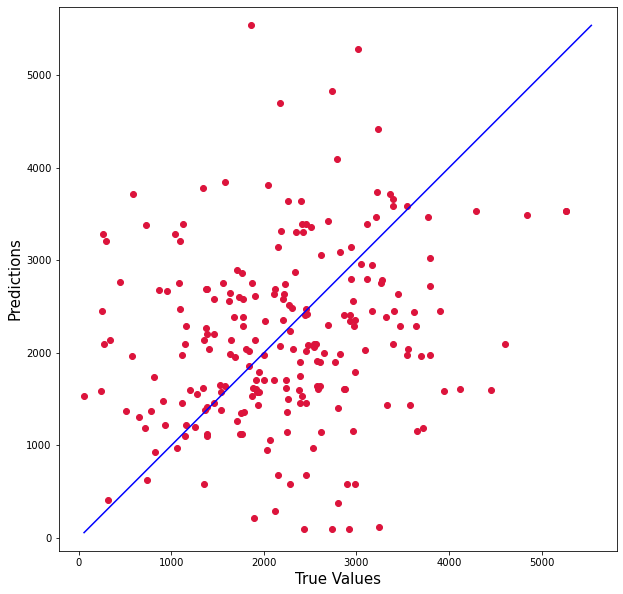

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_rcf, c='crimson')

p1 = max(max(y_pred_rcf), max(y_test))
p2 = min(min(y_pred_rcf), min(y_test))
plt.plot([p1, p2],[p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [29]:
!pip install xgboost

In [30]:
import xgboost as xgb

In [31]:
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

In [32]:
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test)

In [33]:
#xgb parameters
xgb_params = {
    "eta":0.3,
    "max_depth":6,
    "min_child_size":1,
    
    "objective":"reg:linear",
    "seed":42
}
xgb_model = xgb.train(xgb_params, train_dmatrix,num_boost_round=10)
    

[13:23:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:23:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_child_size" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [34]:
xgb_pred = xgb_model.predict(test_dmatrix)

In [35]:
xgb_pred

array([2150.926 , 3020.9995, 2501.7517, 2027.6615, 2228.9397, 2164.2554,
       2070.8699, 2488.4846, 2639.971 , 1418.461 , 1627.4829, 2771.4392,
       2238.5686, 1959.7955, 1465.282 , 2009.6157, 1271.0565, 1712.0232,
       2226.4446, 2172.7927, 1666.1145, 2324.4019, 1911.8828, 2804.055 ,
       2330.5315, 2331.1   , 1983.4437, 2082.5933, 1783.4895, 2139.1646,
       2158.5872, 2293.2866, 1475.8961, 2099.104 , 1730.5216, 1975.4252,
       1828.606 , 2290.9724, 1184.2802, 2375.3718, 1991.7408, 2017.9075,
       2175.4749, 2275.5916, 2359.0137, 1776.1581, 1460.1902, 2584.5137,
       1985.0085, 1194.7036, 1398.4569, 2067.6047, 1517.6252, 1718.488 ,
       2322.82  , 1838.943 , 1169.9434, 2278.6775, 2341.409 , 2696.721 ,
       1817.3385, 1729.7739, 2059.5215, 2367.7136, 2147.706 , 1686.8405,
       2139.1646, 2293.6707, 2007.4242, 2447.081 , 2085.0054, 2178.3762,
       1779.7366, 1941.4883, 2149.517 , 1779.7366, 1702.8488, 2826.5273,
       1481.2472, 1984.0403, 2182.7446, 1398.6141, 

In [39]:
print(mean_absolute_error(y_test,xgb_pred))

770.5428074428013


# Other Machine Learning Algorithms

In [37]:
 # TODO: Try another Machine Learning Algorithms